[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Logistic Regression Implementation

# Instructions:
1. Save a copy of this notebook in your drive;
2. Name it by: `Your_fullname_LogRegression.ipynb`
3. Close the original notebook
4. Start typing your codes.

`Note:` Discuss with your neighbors.

# Part 1: Data preparation

## Import Dataset Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

Question 0: Import the dataset Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
##### WRITE YOUR CODE HERE #####
path= '/content/drive/MyDrive/apprentissage_supervise/diabetes.csv'
data= pd.read_csv(path)
#### END CODE ####

Question 1: Print the first five rows of the Dataset

In [4]:
##### WRITE YOUR CODE HERE #####
data.head()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Question 2: Check the types of your variables/features

In [5]:
##### WRITE YOUR CODE HERE #####
data.dtypes
#### END CODE ####

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Question 3: Describe your dataset

In [6]:
##### WRITE YOUR CODE HERE #####
data.describe()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Question 4: write a function that scale your features.
`Hint:` $x'= \dfrac{x-\mu}{\sigma}$ 
where $\mu$ is the mean and $\sigma$ the standard deviation of $x$.

In [7]:
##### WRITE YOUR CODE HERE #####
def scale(x):
  return  (x -np.mean(x))/np.std(x)  #output
#### END CODE ####

In [8]:
np.mean(data)

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

Question 5: Scale your features, except the target. 

In [9]:
##### WRITE YOUR CODE HERE #####
data.iloc[:,:-1] = scale(data)
#print(data)
data
#### END CODE #### 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


Question 6: Write a function that split your (x,y) to (x_train, y_train) and (x_test, y_test).
`Note:` This function must return an arrays.

In [10]:
##### WRITE YOUR CODE HERE #####
def split_data(df, train_percent= 0.8):
  np.random.seed(2)
  perm = np.random.permutation(df.index)

  n= len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  x_train, x_test, y_train, y_test= train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]
  return x_train.values, x_test.values, y_train.values, y_test.values
#### END CODE ####

In [11]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [12]:
y_train = y_train.reshape(y_train.shape[0],1)
y_test =  y_test.reshape(y_test.shape[0] ,1)

# Part 2: Logistic Regression without Regularization.

## Recaps:
1. Logistic/sigmoid function of $z$:
\begin{equation}
g(z)= \dfrac{1}{1+ exp(-z)}
\end{equation}
where $z= x^t \theta$ and $x, y \in \mathbb{R}^d$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
dg(z)= g(z)(1-g(z))
\end{equation}
3. Cross-entropy loss:
\begin{equation}
l(\theta)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}
where $y_{true}= g(z)$, $z= x^t \theta$ and $y_{true}$ is the ground-truth for a given $x$.

4. Derivative of Cross-entropy loss with respective to $\theta$:
\begin{equation}
dl(\theta)= -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{ped} \right)
\end{equation}
5. Apply Batch gradient descent or stochastic gradient descent to update $\theta$.

Question: Create a class called LogReg. See the description in the below cells.


In [13]:
class logistic_regression:
  def __init__(self, x_test, y_test, num_iters, threshold= 0.5, tolerance= 1e-10, lr= 0.001):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters= num_iters
    self.threshold= threshold
    self.tolerance= tolerance
    self.lr= lr
    self.theta= None
    self.x_test= x_test
    self.y_test= y_test
    self.cost_history= []
    self.cost_history_test= []
    #### END CODE ####
   

  def add_ones(self, x):
    ##### WRITE YOUR CODE HERE #####
    ### Ajouter une colonne de biais c-a-d une colonne de valeur 1 dans le dataset comme c'etait le cas pour le dataset de la regression ### 
    x_new = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
    return x_new
    #### END CODE ####

  def sigmoid(self, x, theta):
    ##### WRITE YOUR CODE HERE #####
    one_matrice = np.ones((x.shape[0],1)) # de meme dimension que y_hat
    return  one_matrice / (one_matrice  + np.exp(-x.dot(theta)))
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    n = x.shape[0]
    y_hat = self.sigmoid(x,self.theta)
    one_matrice = np.ones((y_true.shape[0],1))
    Cost = -(1/n)*np.sum( (y_true.T).dot(np.log(y_hat)) + ((one_matrice - y_true).T).dot(np.log(one_matrice - y_hat)) )
    return Cost
    #### END CODE ####

  def gradient(self,x, y_true):
    n = x.shape[0]
    grd = -(1/n)*(x.T).dot(y_true - self.sigmoid(x,self.theta))
    return grd
  #methode Batch 
  def fit(self, x,y):
    ##### WRITE YOUR CODE HERE #####
    x = self.add_ones(x) # Add ones to x
    y= y.reshape(-1, 1) # reshape y. This is optional, do it if needed

    self.x_test= self.add_ones(self.x_test) # Add ones to x
    self.y_test= self.y_test.reshape(-1, 1) # reshape y. This is optional, do it if needed
    self.theta= np.zeros((x.shape[1],1))     # Initialize theta to zeros vector >>> (x.shape[1])
    ### Completer le code ###
    for i in range(0,self.num_iters) :
       self.theta =  self.theta - self.lr*self.gradient(x,y)
       self.cost_history.append(self.cross_entropy(x,y)) 
       self.cost_history_test.append(self.cross_entropy(self.x_test, self.y_test)) 

  #methode stochastique
  def fit2(self, x,y):
      ##### WRITE YOUR CODE HERE #####
      x = self.add_ones(x) # Add ones to x
      y= y.reshape(-1, 1) # reshape y. This is optional, do it if needed
      self.x_test= self.add_ones(self.x_test) # Add ones to x
      self.y_test= self.y_test.reshape(-1, 1) # reshape y. This is optional, do it if needed
      self.theta= np.zeros((x.shape[1],1))     # Initialize theta to zeros vector >>> (x.shape[1])
      ### Completer le code ###
      for i in range(0,self.num_iters) :
        rd_nmber = random.choice(np.arange(0, x.shape[0]))
        X_line = x[rd_nmber, :].reshape([1 , x.shape[1] ]) 
        Y_line = y[rd_nmber, 0:1]
        self.theta =  self.theta - self.lr*self.gradient(X_line,Y_line)
        self.cost_history.append(self.cross_entropy(x,y)) 
        self.cost_history_test.append(self.cross_entropy(self.x_test, self.y_test)) 
    #### END CODE ####
  
  def predict(self, x):
    proba= self.predict_proba(x) # Get probability of x
    # Convert proba to 0 or 1. hint: list comprehension
    proba = np.where(proba >= 0.5, 1, proba)
    proba = np.where(proba < 0.5, 0, proba)
    return proba
  
    
  def predict_proba(self, x):
    x= self.add_ones(x) # Apply add ones to x
    y_pred_prob = self.sigmoid(x,self.theta)  # Predict proba with sigmoid
    return y_pred_prob
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(np.arange(len(self.cost_history)), self.cost_history, 'r', linewidth = "2", label= 'Train Loss')
    plt.plot(np.arange(len(self.cost_history_test)), self.cost_history_test, 'b', linewidth = "2", label= 'Validation Loss')
    plt.legend()
    plt.show()

  def accuracy(self, y_pred): # pour le pourcentage de bonne prédiction
    return (np.sum(y_pred == self.y_test)/len(self.y_test))*100
    #### END CODE ####

In [14]:
# Create a model by instanciating the class logistic_regression
model_1 = logistic_regression(x_test, y_test, num_iters=10000)

In [15]:
%%time
model_1.fit(x_train, y_train)

CPU times: user 1.57 s, sys: 0 ns, total: 1.57 s
Wall time: 1.58 s


In [16]:
pred_1= model_1.predict(x_test)

In [17]:
model_1.accuracy(pred_1)

78.57142857142857

In [18]:
pred_1.shape

(154, 1)

In [19]:
# Predict Proba
#print(model.predict_proba(x_test))

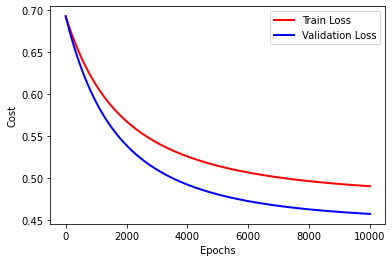

In [20]:
model_1.plot()

In [21]:
#model.cost_history_test

# Assignment

Just follow the class logistic_regression, try to implement Logistic regression with l1, l2 and l1+l2. That we call respectively `Lasso (least absolute shrinkage and selection operator)`, `Ridge` and `ElasticNet`.
Given cross-entropy:
\begin{equation}
  l(θ)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}

1. l1-regularization (LASSO):

\begin{equation}
   l(θ) + λ\| \theta\|_1
\end{equation}


2. l2-regularization (Ridge):
\begin{equation}
   l(θ)+ λ\| \theta\|_2
\end{equation}

3. l1-l2-regularization (ELasticNet):
\begin{equation}
  l(θ) + λ_1\| \theta\|_1 + λ_2\| \theta\|_2
\end{equation}

In [22]:
class logistic_regression_Regularized_l1:
  def __init__(self, x_test, y_test,num_iters= 1000, threshold= 0.5, tolerance= 1e-10, lr= 0.00001, lambd= 10):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters= num_iters
    self.threshold= threshold
    self.tolerance= tolerance
    self.lambd= lambd 
    self.lr= lr
    self.x_test = x_test
    self.y_test = y_test
    self.theta= None
    self.cost_history= []
    self.cost_history_test= []
    #### END CODE ####


  def add_ones(self, x):
    ##### WRITE YOUR CODE HERE #####
    x_new = np.concatenate((x,np.ones((x.shape[0],1))),axis = 1) 
    return x_new
    #### END CODE ####

  def gradient(self,x, y_true):
    n = x.shape[0]
    grd = -(1/n)*(x.T).dot(y_true - self.sigmoid(x,self.theta)) + self.lambd*np.sign(self.theta)
    return grd

  def sigmoid(self, x, theta):
    ##### WRITE YOUR CODE HERE #####
    one_matrice = np.ones((x.shape[0],1))
    σ= one_matrice / ( one_matrice + np.exp(-(x.dot(theta))))
    return σ
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    n = x.shape[0]
    y_hat = self.sigmoid(x,self.theta)
    one_matrice = np.ones((y_true.shape[0],1))  
    Cost = -(1/n)*np.sum((y_true.T).dot(np.log(y_hat)) + ((one_matrice - y_true).T).dot(np.log(one_matrice - y_hat))) + self.lambd*np.linalg.norm(self.theta[1:n,:],1)
    return Cost
    #### END CODE ####

  def fit(self, x,y):
    ##### WRITE YOUR CODE HERE #####
    x = self.add_ones(x) # Add ones to x
    y= y.reshape(-1, 1) # reshape y. This is optional, do it if needed

    self.x_test= self.add_ones(self.x_test) # Add ones to x
    self.y_test= self.y_test.reshape(-1, 1) # reshape y. This is optional, do it if needed
    self.theta= np.zeros((x.shape[1],1))     # Initialize theta to zeros vector >>> (x.shape[1])
    ### Completer le code ###
    for i in range(0,self.num_iters) :
       self.theta =  self.theta - self.lr*self.gradient(x,y)
       self.cost_history.append(self.cross_entropy(x,y)) 
       self.cost_history_test.append(self.cross_entropy(self.x_test, self.y_test)) 

  #methode stochastique
  def fit2(self, x,y):
      ##### WRITE YOUR CODE HERE #####
      x = self.add_ones(x) # Add ones to x
      y= y.reshape(-1, 1) # reshape y. This is optional, do it if needed
      self.x_test= self.add_ones(self.x_test) # Add ones to x
      self.y_test= self.y_test.reshape(-1, 1) # reshape y. This is optional, do it if needed
      self.theta= np.zeros((x.shape[1],1))     # Initialize theta to zeros vector >>> (x.shape[1])
      ### Completer le code ###
      for i in range(0,self.num_iters) :
        rd_nmber = random.choice(np.arange(0, x.shape[0]))
        X_line = x[rd_nmber, :].reshape([1 , x.shape[1] ]) 
        Y_line = y[rd_nmber, 0:1]
        self.theta =  self.theta - self.lr*self.gradient(X_line,Y_line)
        self.cost_history.append(self.cross_entropy(x,y)) 
        self.cost_history_test.append(self.cross_entropy(self.x_test, self.y_test)) 
  
  def predict(self, x):
    proba= self.predict_proba(x) # Get probability of x
    # Convert proba to 0 or 1. hint: list comprehension
    proba = np.where(proba >= 0.5, 1, proba)
    proba = np.where(proba < 0.5, 0, proba)
    return proba
  
    
  def predict_proba(self, x):
    x= self.add_ones(x) # Apply add ones to x
    y_pred_prob = self.sigmoid(x,self.theta)  # Predict proba with sigmoid
    return y_pred_prob
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(np.arange(len(self.cost_history)), self.cost_history, 'r', linewidth = "2", label= 'Train Loss')
    plt.plot(np.arange(len(self.cost_history_test)), self.cost_history_test, 'b', linewidth = "2", label= 'Validation Loss')
    plt.legend()
    plt.show()

  def accuracy(self, y_pred):
    return (np.sum(y_pred == self.y_test)/len(self.y_test))*100

In [23]:
# Create a model by instanciating the class logistic_regression
model_2 = logistic_regression_Regularized_l1(x_test , y_test)

In [24]:
%%time
model_2.fit2(x_train, y_train)

CPU times: user 175 ms, sys: 514 µs, total: 176 ms
Wall time: 179 ms


In [25]:
model_2.theta

array([[-4.35194269e-05],
       [ 1.03971855e-04],
       [ 7.77465507e-05],
       [-5.29492161e-05],
       [ 3.50121732e-05],
       [-9.83529886e-05],
       [-1.20646189e-05],
       [ 7.34260533e-05],
       [-9.00137304e-05]])

In [26]:
pred_2= model_2.predict(x_test)

In [27]:
model_2.accuracy(pred_2)

66.23376623376623

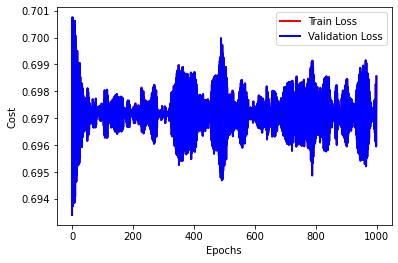

In [28]:
model_2.plot()

In [29]:
class logistic_regression_Regularized_l2:
  def __init__(self,x_test, y_test, lambd, num_iters, threshold= 0.5, tolerance= 1e-10, lr= 0.001):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters= num_iters
    self.threshold= threshold
    self.tolerance= tolerance
    self.lambd= lambd 
    self.x_test = x_test
    self.y_test = y_test
    self.lr= lr
    self.theta= None
    self.cost_history= []
    self.cost_history_test = []
    #### END CODE ####

  def add_ones(self, x):
    ##### WRITE YOUR CODE HERE #####
    x_new = np.concatenate((x,np.ones((x.shape[0],1))),axis = 1) 
    return x_new
    #### END CODE ####

  def gradient(self,x, y_true):
    n = x.shape[0]
    grd = -(1/n)*(x.T).dot(y_true - self.sigmoid(x,self.theta)) + 2*self.lambd*self.theta
    return grd

  def sigmoid(self, x, theta):
    ##### WRITE YOUR CODE HERE #####
    one_matrice = np.ones((x.shape[0],1))
    σ= one_matrice / ( one_matrice + np.exp(-(x.dot(theta))))
    return σ
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE ##### 
    n = x.shape[0]
    y_hat = self.sigmoid(x,self.theta)
    one_matrice = np.ones((y_true.shape[0],1))
    Cost = -(1/n)*np.sum( (y_true.T).dot(np.log(y_hat)) + ((one_matrice - y_true).T).dot(np.log(one_matrice - y_hat)) ) + self.lambd*np.square(np.linalg.norm(self.theta[1:n,:], 2))  
    return Cost
    #### END CODE ####

  def fit(self, x,y):
    ##### WRITE YOUR CODE HERE #####
    x = self.add_ones(x) # Add ones to x
    y= y.reshape(-1, 1) # reshape y. This is optional, do it if needed

    self.x_test= self.add_ones(self.x_test) # Add ones to x
    self.y_test= self.y_test.reshape(-1, 1) # reshape y. This is optional, do it if needed
    self.theta= np.zeros((x.shape[1],1))     # Initialize theta to zeros vector >>> (x.shape[1])
    ### Completer le code ###
    for i in range(0,self.num_iters) :
       self.theta =  self.theta - self.lr*self.gradient(x,y)
       self.cost_history.append(self.cross_entropy(x,y)) 
       self.cost_history_test.append(self.cross_entropy(self.x_test, self.y_test)) 

  #methode stochastique
  def fit2(self, x,y):
      ##### WRITE YOUR CODE HERE #####
      x = self.add_ones(x) # Add ones to x
      y= y.reshape(-1, 1) # reshape y. This is optional, do it if needed
      self.x_test= self.add_ones(self.x_test) # Add ones to x
      self.y_test= self.y_test.reshape(-1, 1) # reshape y. This is optional, do it if needed
      self.theta= np.zeros((x.shape[1],1))     # Initialize theta to zeros vector >>> (x.shape[1])
      ### Completer le code ###
      for i in range(0,self.num_iters) :
        rd_nmber = random.choice(np.arange(0, x.shape[0]))
        X_line = x[rd_nmber, :].reshape([1 , x.shape[1] ]) 
        Y_line = y[rd_nmber, 0:1]
        self.theta =  self.theta - self.lr*self.gradient(X_line,Y_line)
        self.cost_history.append(self.cross_entropy(x,y)) 
        self.cost_history_test.append(self.cross_entropy(self.x_test, self.y_test)) 
  
  def predict(self, x):
    proba= self.predict_proba(x) # Get probability of x
     # Convert proba to 0 or 1. hint: list comprehension
    proba = np.where(proba >= 0.5, 1, proba)
    proba = np.where(proba < 0.5, 0, proba)
    return proba
  
    
  def predict_proba(self, x):
    x= self.add_ones(x) # Apply add ones to x
    y_pred_prob= self.sigmoid(x,self.theta) # Predict proba with sigmoid
    return y_pred_prob
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(np.arange(len(self.cost_history)), self.cost_history, 'r', linewidth = "2", label= 'Train Loss')
    plt.plot(np.arange(len(self.cost_history_test)), self.cost_history_test, 'b', linewidth = "2", label= 'Validation Loss')
    plt.legend()
    plt.show()
    #### END CODE ####

  def accuracy(self, y_pred):
    return (np.sum(y_pred == self.y_test)/len(self.y_test))*100

In [30]:
# Create a model by instanciating the class logistic_regression
model_3 = logistic_regression_Regularized_l2(x_test, y_test, lambd=10, num_iters=10000)

In [31]:
%%time
model_3.fit(x_train, y_train)

CPU times: user 2.45 s, sys: 0 ns, total: 2.45 s
Wall time: 2.46 s


In [32]:
model_3.theta

array([[ 0.00468199],
       [ 0.01012603],
       [ 0.00090224],
       [ 0.00104546],
       [ 0.0021514 ],
       [ 0.00626001],
       [ 0.00357073],
       [ 0.00541011],
       [-0.00804332]])

In [33]:
pred_3= model_3.predict(x_test)

In [34]:
model_3.accuracy(pred_3)

80.51948051948052

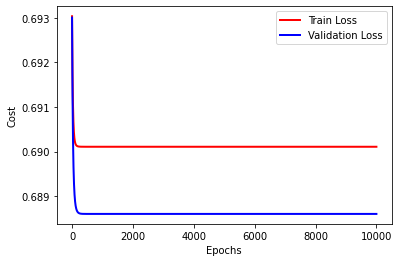

In [35]:
model_3.plot()

In [36]:
lis_la= [10, 15, 20]
arra_err= []

for i in lis_la:
  print('Learning for lambda==: {}'.format(i))
  model_3 = logistic_regression_Regularized_l2(x_test, y_test, lambd=i, num_iters=10000)
  model_3.fit(x_train, y_train)
  arra_err.append(model_3.cost_history)

Learning for lambda==: 10
Learning for lambda==: 15
Learning for lambda==: 20


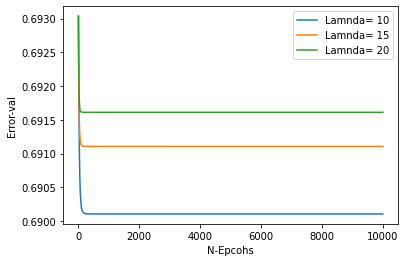

In [37]:
for i, l in zip(arra_err, lis_la):
  plt.plot(i, label='Lamnda= {}'.format(l))
  plt.xlabel('N-Epcohs')
  plt.ylabel('Error-val')
  plt.legend()

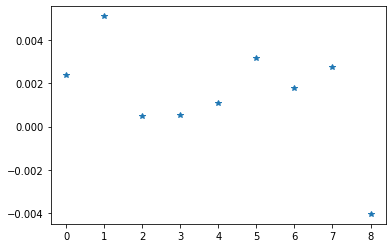

In [38]:
plt.plot(model_3.theta, '*')

In [39]:
class logistic_regression_Regularized_l1_l2:
  def __init__(self, x_test, y_test,num_iters= 100, threshold= 0.5, tolerance= 1e-10, lr= 0.001, lambd1= 10, lambd2= 10):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters= num_iters
    self.threshold= threshold
    self.tolerance= tolerance
    self.lambd1= lambd1 
    self.lambd2= lambd2
    self.lr= lr
    self.x_test = x_test
    self.y_test = y_test
    self.theta= None
    self.cost_history= []
    self.cost_history_test= []
    #### END CODE ####

  def add_ones(self, x):
    ##### WRITE YOUR CODE HERE #####
    x_new = np.concatenate((x,np.ones((x.shape[0],1))),axis = 1) 
    return x_new
    #### END CODE ####

  def gradient(self,x, y_true) :
    n = x.shape[0]   
    grd = -(1/n)*(x.T).dot(y_true - self.sigmoid(x,self.theta)) + self.lambd1*np.sign(self.theta) + 2*self.lambd2*self.theta
    return grd

  def sigmoid(self, x, theta):
    ##### WRITE YOUR CODE HERE #####
    one_matrice = np.ones((x.shape[0],1))
    σ= one_matrice / ( one_matrice + np.exp(-(x.dot(theta))))
    return σ
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    n = x.shape[0]
    y_hat = self.sigmoid(x,self.theta)
    one_matrice = np.ones((y_true.shape[0],1))               
    Cost = -(1/n)*np.sum((y_true.T).dot(np.log(y_hat)) + ((one_matrice - y_true).T).dot(np.log(one_matrice - y_hat))) + self.lambd1*np.linalg.norm(self.theta[1:n,:], 1) +  self.lambd2*np.square(np.linalg.norm(self.theta[1:n,:], 2))
    return Cost
    #### END CODE ####

  def fit(self, x,y):
    ##### WRITE YOUR CODE HERE #####
    x = self.add_ones(x) # Add ones to x
    y= y.reshape(-1, 1) # reshape y. This is optional, do it if needed

    self.x_test= self.add_ones(self.x_test) # Add ones to x
    self.y_test= self.y_test.reshape(-1, 1) # reshape y. This is optional, do it if needed
    self.theta= np.zeros((x.shape[1],1))     # Initialize theta to zeros vector >>> (x.shape[1])
    ### Completer le code ###
    for i in range(0,self.num_iters) :
       self.theta =  self.theta - self.lr*self.gradient(x,y)
       self.cost_history.append(self.cross_entropy(x,y)) 
       self.cost_history_test.append(self.cross_entropy(self.x_test, self.y_test)) 

  #methode stochastique
  def fit2(self, x,y):
      ##### WRITE YOUR CODE HERE #####
      x = self.add_ones(x) # Add ones to x
      y= y.reshape(-1, 1) # reshape y. This is optional, do it if needed
      self.x_test= self.add_ones(self.x_test) # Add ones to x
      self.y_test= self.y_test.reshape(-1, 1) # reshape y. This is optional, do it if needed
      self.theta= np.zeros((x.shape[1],1))     # Initialize theta to zeros vector >>> (x.shape[1])
      ### Completer le code ###
      for i in range(0,self.num_iters) :
        rd_nmber = random.choice(np.arange(0, x.shape[0]))
        X_line = x[rd_nmber, :].reshape([1 , x.shape[1] ]) 
        Y_line = y[rd_nmber, 0:1]
        self.theta =  self.theta - self.lr*self.gradient(X_line,Y_line)
        self.cost_history.append(self.cross_entropy(x,y)) 
        self.cost_history_test.append(self.cross_entropy(self.x_test, self.y_test)) 
  
  def predict(self, x):
    proba= self.predict_proba(x) # Get probability of x
    # Convert proba to 0 or 1. hint: list comprehension
    proba = np.where(proba >= 0.5, 1, proba)
    proba = np.where(proba < 0.5, 0, proba)
    return proba
  
    
  def predict_proba(self, x):
    x= self.add_ones(x) # Apply add ones to x
    y_pred_prob = self.sigmoid(x,self.theta)  # Predict proba with sigmoid
    return y_pred_prob
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(np.arange(len(self.cost_history)), self.cost_history, 'r', linewidth = "2", label= 'Train Loss')
    plt.plot(np.arange(len(self.cost_history_test)), self.cost_history_test, 'b', linewidth = "2", label= 'Validation Loss')
    plt.legend()
    plt.show()

  def accuracy(self, y_pred):
    return (np.sum(y_pred == self.y_test)/len(self.y_test))*100

In [40]:
model_4= logistic_regression_Regularized_l1_l2(x_test , y_test,lambd1=10, lambd2=10,num_iters=10000)

In [41]:
model_4.fit(x_train,y_train)

In [42]:
print(model_4.theta)

[[-3.28352392e-04]
 [ 2.82027804e-03]
 [-4.11164332e-03]
 [-3.98880610e-03]
 [-2.85626956e-03]
 [ 9.12568883e-03]
 [-1.46008087e-03]
 [ 7.28972993e-03]
 [ 5.50521471e-05]]


In [43]:
pred_4= model_4.predict(x_test)

In [44]:
model_4.accuracy(pred_4)

64.93506493506493

# Concepts:
1. Why there is no close form for cross-entropy loss?
2. Why we need cross-entropy loss instead of mse?
3. Why is logistic regression a type of classification technique and not a regression?
4. Why LASSO perform features selection? 

---



---



---